In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# отключаем вывод предупреждений tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

## Hamiltonian Monte-Carlo

In [5]:
# Сгенерируем синтетические данные
np.random.seed(42)
observed_data = np.random.normal(loc=5, scale=2, size=100)

# Специфицируем байесовскую модель
# Задаем prior-распределения для параметров модели
prior_mu = tfp.distributions.Normal(loc=0.0, scale=10.0)
prior_sigma = tfp.distributions.HalfNormal(scale=10.0)

# Задаем модель для данных
def log_prob(mu, sigma):
    likelihood = tfp.distributions.Normal(loc=mu, scale=sigma)
    return tf.reduce_sum(likelihood.log_prob(observed_data)) + tf.reduce_sum(prior_mu.log_prob(mu)) + tf.reduce_sum(prior_sigma.log_prob(sigma))

# Запускаем MCMC-алгоритм и получаем семплы
n_samples = 1000
initial_state = [tf.constant(0.0), tf.constant(1.0)]

states, kernel_results = tfp.mcmc.sample_chain(num_results=n_samples,
                                           num_burnin_steps=100,
                                           current_state=initial_state,
                                           kernel=tfp.mcmc.HamiltonianMonteCarlo(target_log_prob_fn=lambda mu, sigma: log_prob(mu, sigma), 
                                                                                 step_size=0.01, 
                                                                                 num_leapfrog_steps=10))

# Получаем семплы параметров из постериорного распределения
mu_samples = states[0].numpy()
sigma_samples = states[1].numpy()

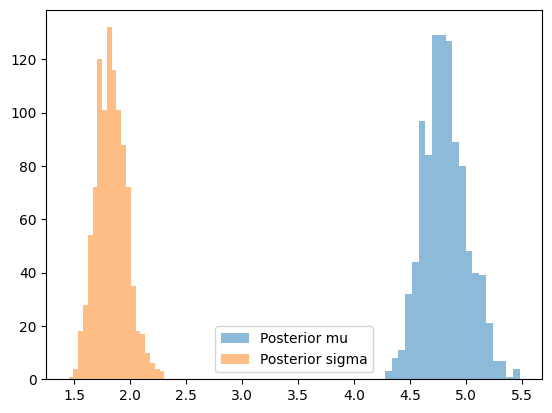

In [6]:
# Визуализация результатов
plt.hist(mu_samples, bins=20, alpha=0.5, label='Posterior mu')
plt.hist(sigma_samples, bins=20, alpha=0.5, label='Posterior sigma')
plt.legend()
plt.show()